In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("static/data/requests_var.csv", low_memory=False)
df.head()

,priority,service_code_description,ward,days_resolved,weekend_ind,month
0,STANDARD,SIDEWALK REPAIR,W4,76,Weekday,July
1,STANDARD,ALLEY CLEANING,W4,0,Weekday,September
2,STANDARD,ALLEY CLEANING,W4,0,Weekday,August
3,STANDARD,ALLEY CLEANING,W4,0,Weekday,August
4,STANDARD,RECYCLING CART DELIVERY,W4,0,Weekend,June


In [3]:
df.shape

(2139048, 6)

In [4]:
samp_list = np.random.choice(np.arange(0, len(df)), 30000, replace=False)
data = df.iloc[samp_list,:]
df.astype({'ward': 'category'}).dtypes

priority                      object
service_code_description      object
ward                        category
days_resolved                  int64
weekend_ind                   object
month                         object
dtype: object

In [5]:
target = data["days_resolved"]
data = data.drop("days_resolved", axis=1)
data.head()

,priority,service_code_description,ward,weekend_ind,month
459153,URGENT,ALLEYLIGHT REPAIR INVESTIGATION,W4,Weekday,October
772489,STANDARD,STREETLIGHT REPAIR INVESTIGATION,W8,Weekday,September
1786808,STANDARD,PARKING METER REPAIR,W2,Weekday,April
1821589,STANDARD,PARKING ENFORCEMENT,W2,Weekday,April
1701418,STANDARD,BULK COLLECTION,W1,Weekend,November


In [6]:
data = pd.get_dummies(data)
data.head()

,priority_EMERGENCY,priority_STANDARD,priority_URGENT,service_code_description_311FORCE REPORTED ISSUES,service_code_description_ABANDONED BICYCLE,service_code_description_ABANDONED VEHICLE - ON PRIVATE PROPERTY,service_code_description_ABANDONED VEHICLE - ON PUBLIC PROPERTY,service_code_description_ALLEY CLEANING,service_code_description_ALLEY REPAIR,service_code_description_ALLEYLIGHT INVESTIGATION,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
459153,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
772489,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1786808,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1821589,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1701418,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
feature_names = data.columns

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.30693333333333334

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.3032

In [11]:
feature_important_list = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
feature_important_list

[(0.14451331813365428, 'service_code_description_PARKING ENFORCEMENT'),
 (0.048640088972095735,
  'service_code_description_EMERGENCY NO-PARKING VERIFICATION'),
 (0.03286584743959314, 'service_code_description_BULK COLLECTION'),
 (0.03018470698956253,
  'service_code_description_RESIDENTIAL PARKING PERMIT VIOLATION'),
 (0.025596398271192436, 'month_July'),
 (0.025468915385697278, 'ward_W5'),
 (0.0252045002851929, 'month_May'),
 (0.02471132073333211, 'month_August'),
 (0.02433979980057012, 'month_June'),
 (0.024080945834961544, 'month_March'),
 (0.023975057988620714, 'ward_W4'),
 (0.023882377764364335, 'month_April'),
 (0.023859090207689483, 'ward_W3'),
 (0.02357945256000679, 'month_September'),
 (0.02274232559431759, 'month_October'),
 (0.021262145378463534, 'ward_W1'),
 (0.02117823425692836, 'ward_W6'),
 (0.020581941905607203, 'month_February'),
 (0.019894352777354147, 'month_December'),
 (0.019670180312867755, 'month_November'),
 (0.01955309677584215, 'ward_W7'),
 (0.018233020759662,

In [12]:
regress_df = pd.merge(df, data, left_index=True, right_index=True)
regress_df.head()

,priority,service_code_description,ward,days_resolved,weekend_ind,month,priority_EMERGENCY,priority_STANDARD,priority_URGENT,service_code_description_311FORCE REPORTED ISSUES,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
9,STANDARD,ALLEY CLEANING,W4,0,Weekend,September,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
121,STANDARD,CURB AND GUTTER REPAIR,W5,77,Weekday,October,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
124,STANDARD,ALLEY CLEANING,W5,0,Weekday,September,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
134,STANDARD,PARKING METER REQUEST,W6,2,Weekday,April,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
291,STANDARD,PARKING ENFORCEMENT,W6,0,Weekend,April,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
regress_df = regress_df[['days_resolved', 'service_code_description_PARKING ENFORCEMENT', 'service_code_description_EMERGENCY NO-PARKING VERIFICATION', 'service_code_description_BULK COLLECTION', 'service_code_description_RESIDENTIAL PARKING PERMIT VIOLATION', 'ward_W5', 'month_June', 'month_July']]
regress_df.head()

,days_resolved,service_code_description_PARKING ENFORCEMENT,service_code_description_EMERGENCY NO-PARKING VERIFICATION,service_code_description_BULK COLLECTION,service_code_description_RESIDENTIAL PARKING PERMIT VIOLATION,ward_W5,month_June,month_July
9,0,0,0,0,0,0,0,0
121,77,0,0,0,0,1,0,0
124,0,0,0,0,0,1,0,0
134,2,0,0,0,0,0,0,0
291,0,1,0,0,0,0,0,0


In [14]:
X = regress_df[['service_code_description_PARKING ENFORCEMENT', 'service_code_description_EMERGENCY NO-PARKING VERIFICATION', 'service_code_description_BULK COLLECTION', 'service_code_description_RESIDENTIAL PARKING PERMIT VIOLATION', 'month_June', 'month_July']]
y = regress_df["days_resolved"].values.reshape(-1, 1)
print(X.shape, y.shape)

(30000, 6) (30000, 1)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.03151595654027406
Testing Score: 0.0288466016659934


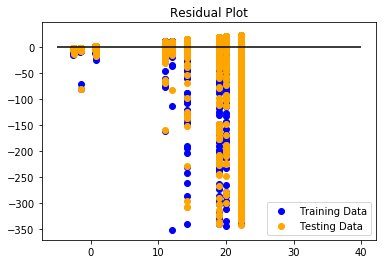

In [16]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=40)
plt.title("Residual Plot")
plt.legend(loc='lower right')